<a href="https://colab.research.google.com/github/siam99773/machine_learning_computer_vision/blob/main/masking_class4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

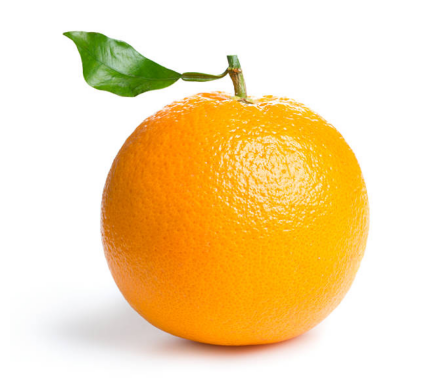

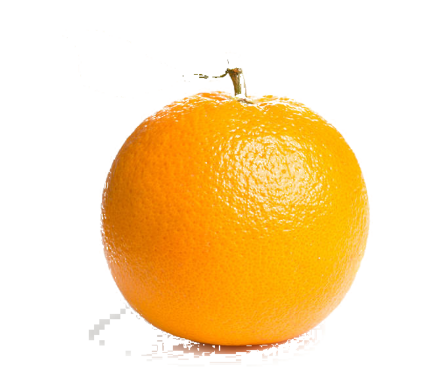

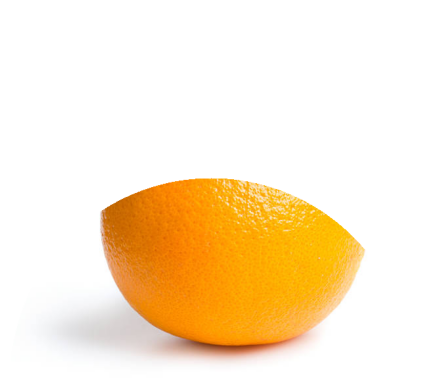

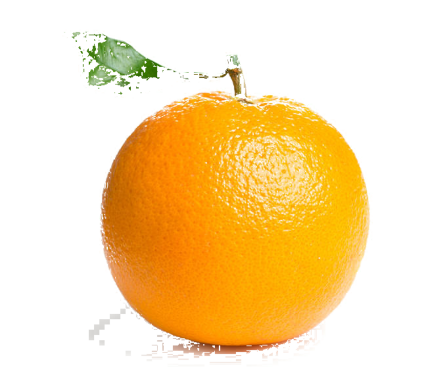

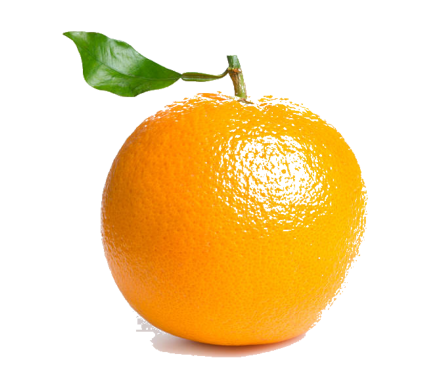

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2hsv, rgb2gray
from skimage.filters import threshold_otsu


image = Image.open('/content/orange-1.jpg')


image_np = np.array(image)


plt.imshow(image_np)
plt.axis('off')
plt.show()


#HW1
image_hsv = rgb2hsv(image_np)
low_hue = 0.05
high_hue = 0.15

mask_orange = (image_hsv[:, :, 0] > low_hue) & (image_hsv[:, :, 0] < high_hue)


orange_only = np.copy(image_np)
orange_only[~mask_orange] = [255, 255, 255]

plt.imshow(orange_only)
plt.axis('off')
plt.show()

#HW3
height, width = image_np.shape[:2]
center_x, center_y = width // 2, height
radius = min(center_x, center_y)

Y, X = np.ogrid[:height, :width]
distance_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
circular_mask = distance_from_center <= radius


masked_image = np.copy(image_np)
masked_image[~circular_mask] = [255, 255, 255]

plt.imshow(masked_image)
plt.axis('off')
plt.show()
# Bonus-1:

low_hue_orange = 0.05
high_hue_orange = 0.15
low_hue_green = 0.25
high_hue_green = 0.4


mask_orange_leaf = ((image_hsv[:, :, 0] > low_hue_orange) & (image_hsv[:, :, 0] < high_hue_orange)) | \
                   ((image_hsv[:, :, 0] > low_hue_green) & (image_hsv[:, :, 0] < high_hue_green))

orange_leaf_only = np.copy(image_np)
orange_leaf_only[~mask_orange_leaf] = [255, 255, 255]


plt.imshow(orange_leaf_only)
plt.axis('off')
plt.show()

# Bonus-2:
image_gray = rgb2gray(image_np)


thresh_value = threshold_otsu(image_gray)


mask_thresh = image_gray < thresh_value
masked_thresh_image = np.copy(image_np)
masked_thresh_image[~mask_thresh] = [255, 255, 255]


plt.imshow(masked_thresh_image)
plt.axis('off')
plt.show()
